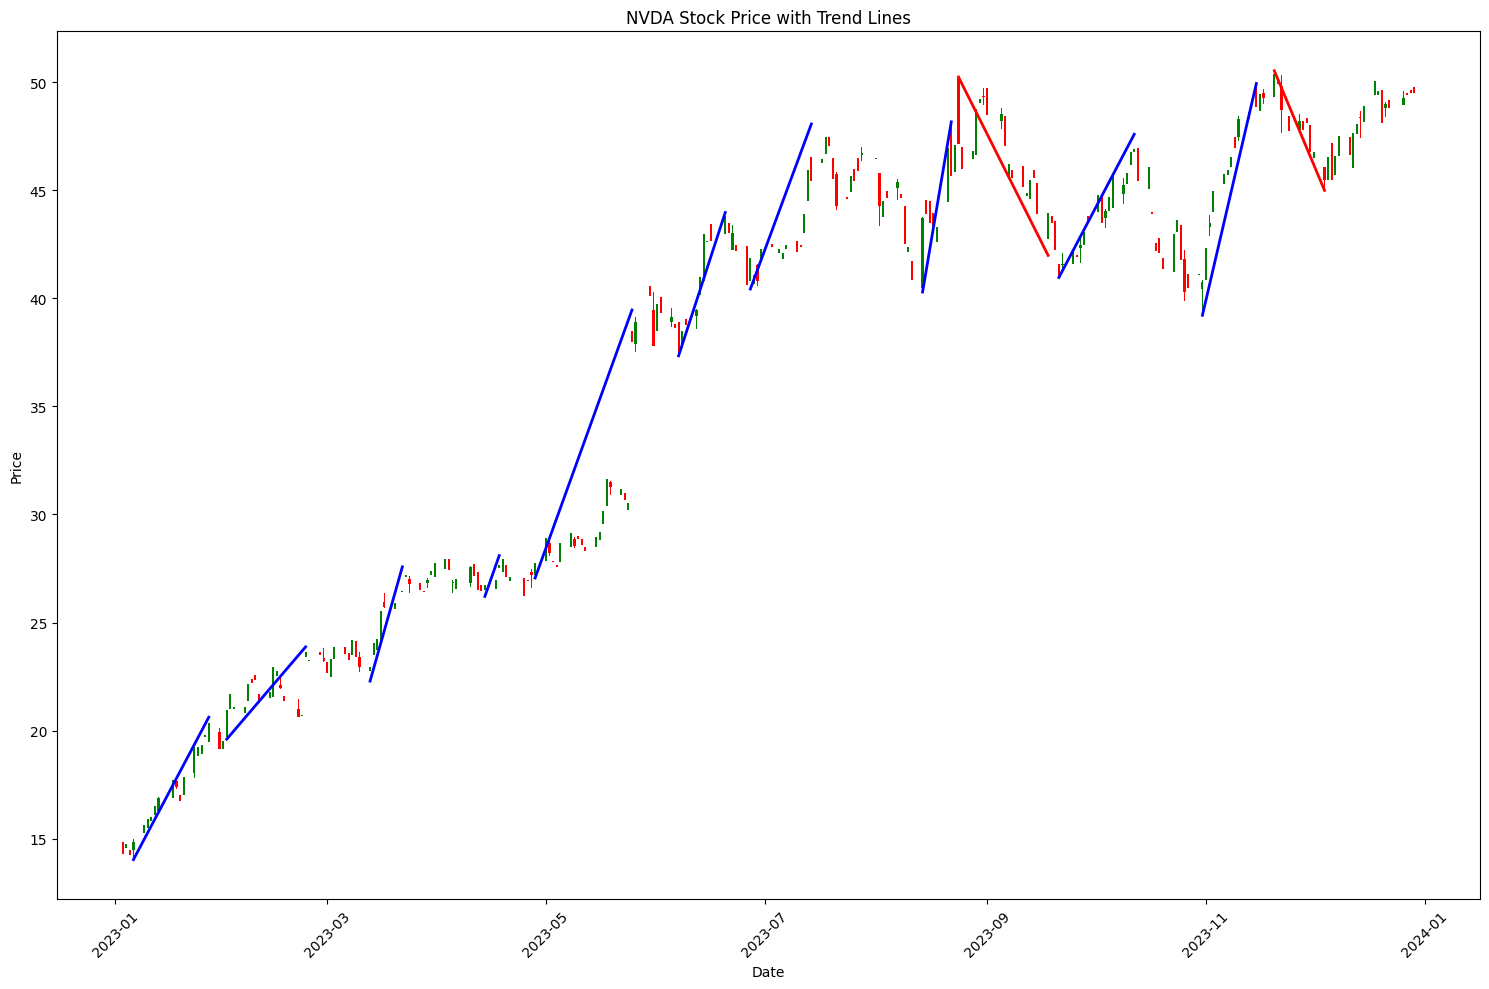

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

def find_trend_lines(data, window=20):
    trends = []
    for i in range(0, len(data) - window, window):
        segment = data.iloc[i:i+window]
        max_price = segment['High'].max()
        min_price = segment['Low'].min()
        max_index = segment['High'].idxmax()
        min_index = segment['Low'].idxmin()
        
        if max_index > min_index:  # 상승 트렌드
            trends.append(('up', min_index, max_index, min_price, max_price))
        else:  # 하락 트렌드
            trends.append(('down', max_index, min_index, max_price, min_price))
    
    return trends

def plot_candlestick_with_trendlines(data, trends):
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 캔들스틱 차트 그리기
    width = 0.6
    width2 = 0.05
    up = data[data.Close >= data.Open]
    down = data[data.Close < data.Open]
    
    ax.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color='g')
    ax.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color='g')
    ax.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color='g')

    ax.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color='r')
    ax.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color='r')
    ax.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color='r')
    
    # 트렌드 라인 그리기
    for trend in trends:
        direction, start, end, start_price, end_price = trend
        color = 'b' if direction == 'up' else 'r'
        ax.plot([start, end], [start_price, end_price], color=color, linewidth=2)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('NVDA Stock Price with Trend Lines')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
ticker = "NVDA"
start_date = "2023-01-01"
end_date = "2024-01-01"

data = get_stock_data(ticker, start_date, end_date)
trends = find_trend_lines(data)
plot_candlestick_with_trendlines(data, trends)

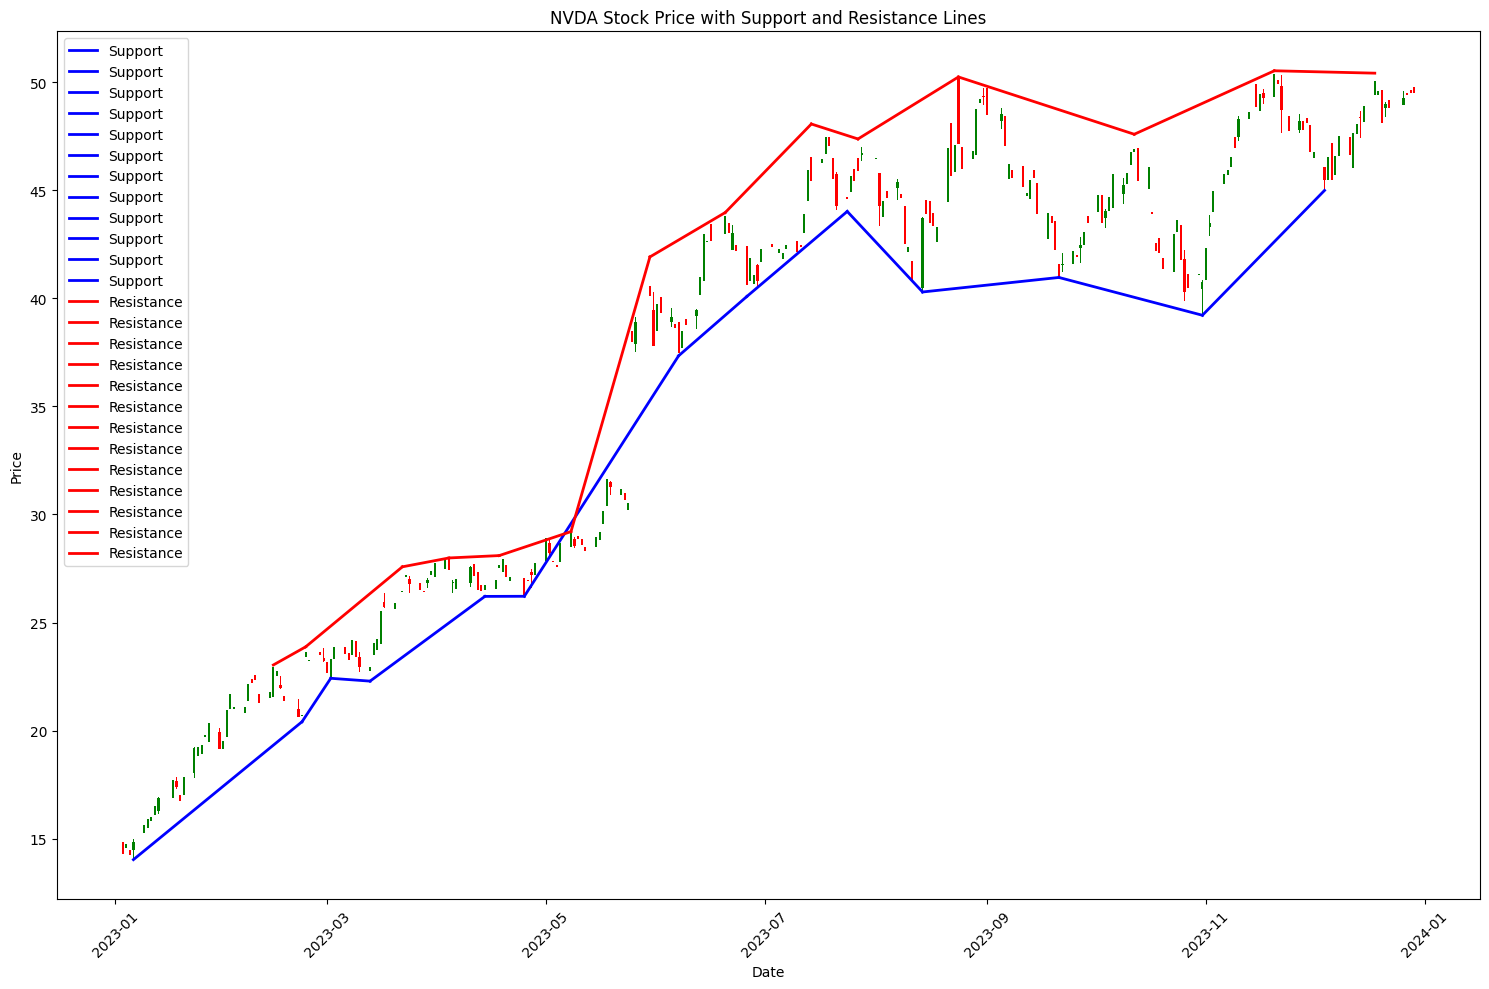

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

def find_support_resistance(data, order=5):
    # 고점과 저점 찾기
    high_idx = argrelextrema(data['High'].values, np.greater, order=order)[0]
    low_idx = argrelextrema(data['Low'].values, np.less, order=order)[0]
    
    # 저항선 (고점 연결)
    resistance = []
    for i in range(len(high_idx) - 1):
        s = high_idx[i]
        e = high_idx[i+1]
        slope = (data['High'].iloc[e] - data['High'].iloc[s]) / (e - s)
        intercept = data['High'].iloc[s] - slope * s
        resistance.append((s, e, slope, intercept))
    
    # 지지선 (저점 연결)
    support = []
    for i in range(len(low_idx) - 1):
        s = low_idx[i]
        e = low_idx[i+1]
        slope = (data['Low'].iloc[e] - data['Low'].iloc[s]) / (e - s)
        intercept = data['Low'].iloc[s] - slope * s
        support.append((s, e, slope, intercept))
    
    return support, resistance

def plot_candlestick_with_support_resistance(data, support, resistance):
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # 캔들스틱 차트 그리기
    width = 0.6
    width2 = 0.05
    up = data[data.Close >= data.Open]
    down = data[data.Close < data.Open]
    
    ax.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color='g')
    ax.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color='g')
    ax.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color='g')

    ax.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color='r')
    ax.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color='r')
    ax.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color='r')
    
    # 지지선과 저항선 그리기
    for s, e, slope, intercept in support:
        x = np.array([s, e])
        y = slope * x + intercept
        ax.plot(data.index[x], y, 'b-', linewidth=2, label='Support')
    
    for s, e, slope, intercept in resistance:
        x = np.array([s, e])
        y = slope * x + intercept
        ax.plot(data.index[x], y, 'r-', linewidth=2, label='Resistance')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('NVDA Stock Price with Support and Resistance Lines')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
ticker = "NVDA"
start_date = "2023-01-01"
end_date = "2024-01-01"

data = get_stock_data(ticker, start_date, end_date)
support, resistance = find_support_resistance(data)
plot_candlestick_with_support_resistance(data, support, resistance)